In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from IPython.display import display

plt.style.use("seaborn-v0_8")
sns.set_theme()

pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 100)

In [2]:
# Adapter le chemin si besoin
data_path = "../data/netflix_titles.csv"

df = pd.read_csv(data_path)
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [3]:
df.shape, df.columns
df.info()
df.describe(include="all").transpose()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
show_id,8807,8807,s1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
type,8807,2,Movie,6131,NaN,NaN,NaN,NaN,NaN,NaN,NaN
title,8807,8807,Dick Johnson Is Dead,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
director,6173,4528,Rajiv Chilaka,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cast,7982,7692,David Attenborough,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN
country,7976,748,United States,2818,NaN,NaN,NaN,NaN,NaN,NaN,NaN
date_added,8797,1767,"January 1, 2020",109,NaN,NaN,NaN,NaN,NaN,NaN,NaN
release_year,8807.0,NaN,NaN,NaN,2014.180198,8.819312,1925.0,2013.0,2017.0,2019.0,2021.0
rating,8803,17,TV-MA,3207,NaN,NaN,NaN,NaN,NaN,NaN,NaN
duration,8804,220,1 Season,1793,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df_clean = df.copy()

# Nettoyer les espaces et convertir en datetime (formats mixtes)
df_clean["date_added"] = (
    df_clean["date_added"]
    .astype(str)         # évite les erreurs sur valeurs manquantes
    .str.strip()         # retire les espaces au début et à la fin
)

df_clean["date_added"] = pd.to_datetime(df_clean["date_added"], errors="coerce")

# Création de variables dérivées
df_clean["year_added"] = df_clean["date_added"].dt.year
df_clean["month_added"] = df_clean["date_added"].dt.month

# Nettoyage léger des colonnes textuelles
for col in ["director", "cast", "country", "rating", "listed_in"]:
    df_clean[col] = df_clean[col].fillna("Inconnu").astype(str).str.strip()

df_clean["title"] = df_clean["title"].astype(str).str.strip()

df_clean.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Inconnu,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021.0,9.0
1,s2,TV Show,Blood & Water,Inconnu,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021.0,9.0
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Inconnu,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021.0,9.0
3,s4,TV Show,Jailbirds New Orleans,Inconnu,Inconnu,Inconnu,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021.0,9.0
4,s5,TV Show,Kota Factory,Inconnu,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021.0,9.0


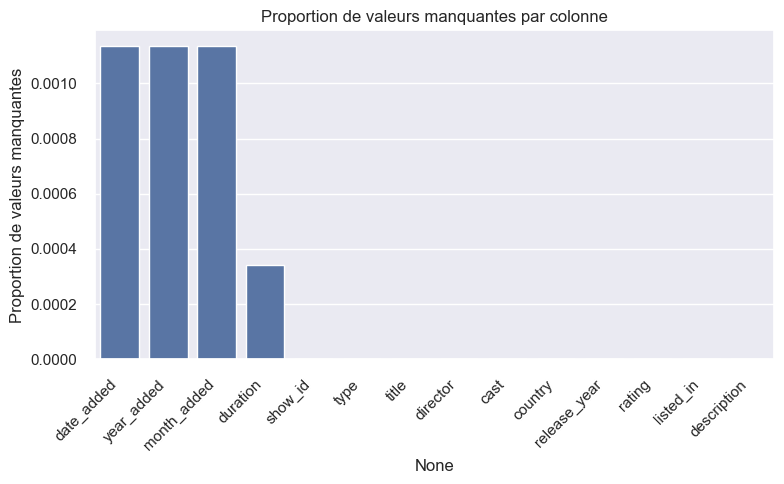

In [5]:
missing = df_clean.isna().mean().sort_values(ascending=False)
missing
plt.figure(figsize=(8, 5))
sns.barplot(x=missing.index, y=missing.values)
plt.xticks(rotation=45, ha="right")
plt.ylabel("Proportion de valeurs manquantes")
plt.title("Proportion de valeurs manquantes par colonne")
plt.tight_layout()
plt.show()

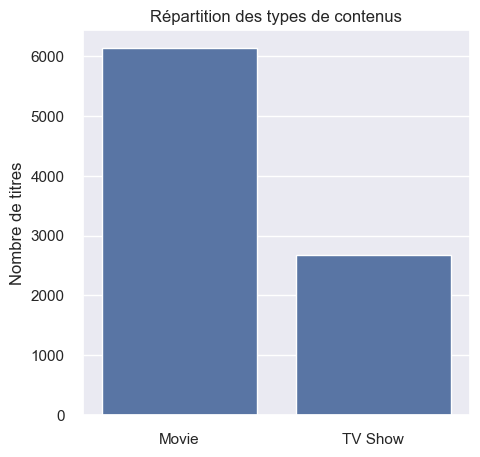

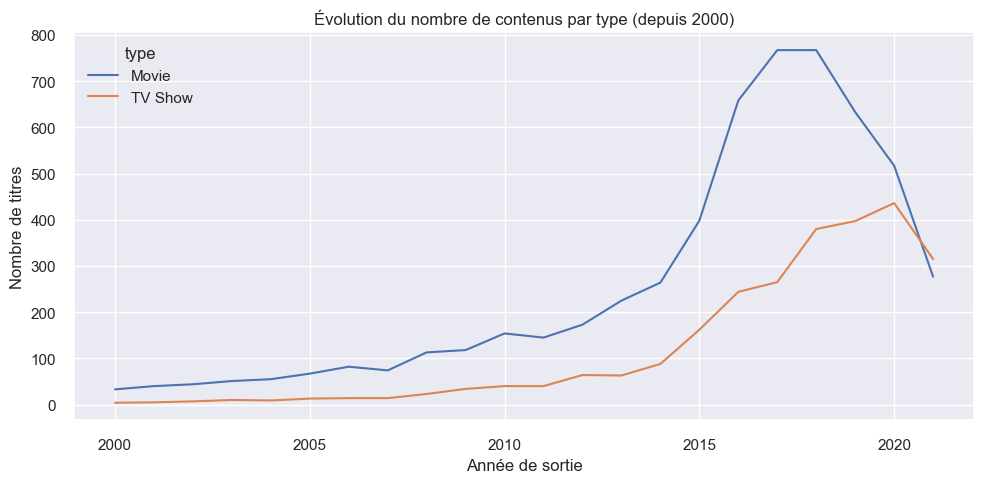

In [6]:
df_clean["type"].value_counts()
plt.figure(figsize=(5, 5))
sns.countplot(data=df_clean, x="type")
plt.title("Répartition des types de contenus")
plt.xlabel("")
plt.ylabel("Nombre de titres")
plt.show()
type_year = (
    df_clean.groupby(["release_year", "type"])["show_id"]
    .count()
    .reset_index(name="count")
)

plt.figure(figsize=(10, 5))
sns.lineplot(data=type_year[type_year["release_year"] >= 2000],
             x="release_year", y="count", hue="type")
plt.title("Évolution du nombre de contenus par type (depuis 2000)")
plt.xlabel("Année de sortie")
plt.ylabel("Nombre de titres")
plt.tight_layout()
plt.show()

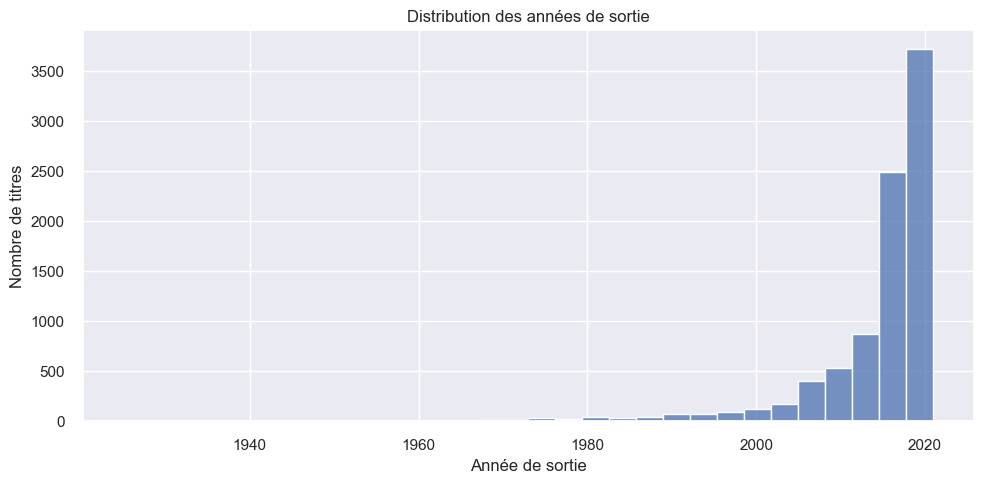

In [7]:
plt.figure(figsize=(10, 5))
sns.histplot(data=df_clean, x="release_year", bins=30, kde=False)
plt.title("Distribution des années de sortie")
plt.xlabel("Année de sortie")
plt.ylabel("Nombre de titres")
plt.tight_layout()
plt.show()

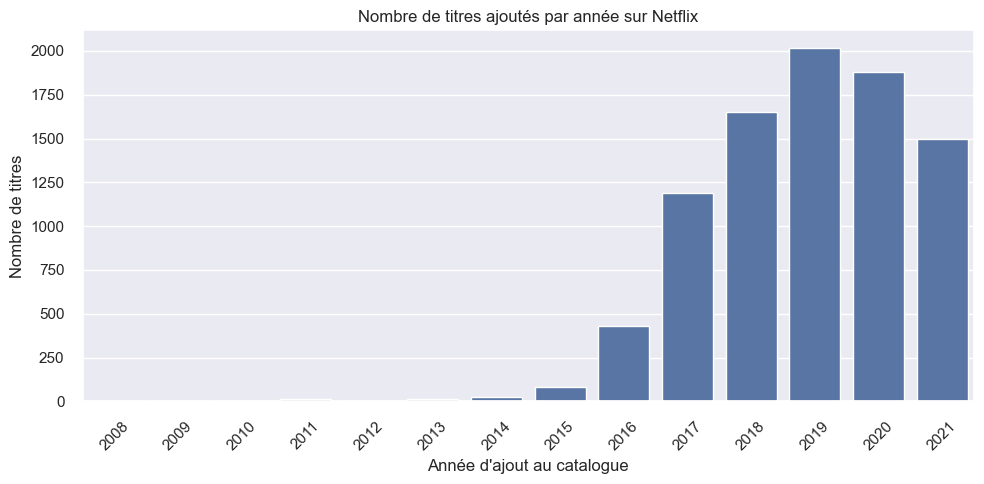

In [8]:
added_per_year = df_clean["year_added"].value_counts().sort_index()
added_per_year = added_per_year[added_per_year.index > 0]

plt.figure(figsize=(10, 5))
sns.barplot(x=added_per_year.index.astype(int), y=added_per_year.values)
plt.title("Nombre de titres ajoutés par année sur Netflix")
plt.xlabel("Année d'ajout au catalogue")
plt.ylabel("Nombre de titres")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


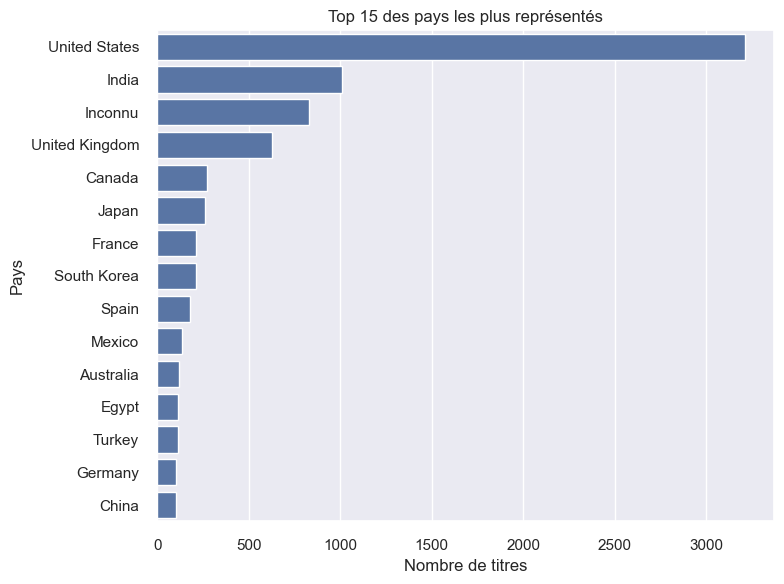

In [9]:
# Extraction du premier pays (quand il y en a plusieurs)
df_clean["main_country"] = df_clean["country"].str.split(",").str[0].str.strip()

top_countries = (
    df_clean["main_country"]
    .value_counts()
    .head(15)
)

plt.figure(figsize=(8, 6))
sns.barplot(y=top_countries.index, x=top_countries.values)
plt.title("Top 15 des pays les plus représentés")
plt.xlabel("Nombre de titres")
plt.ylabel("Pays")
plt.tight_layout()
plt.show()

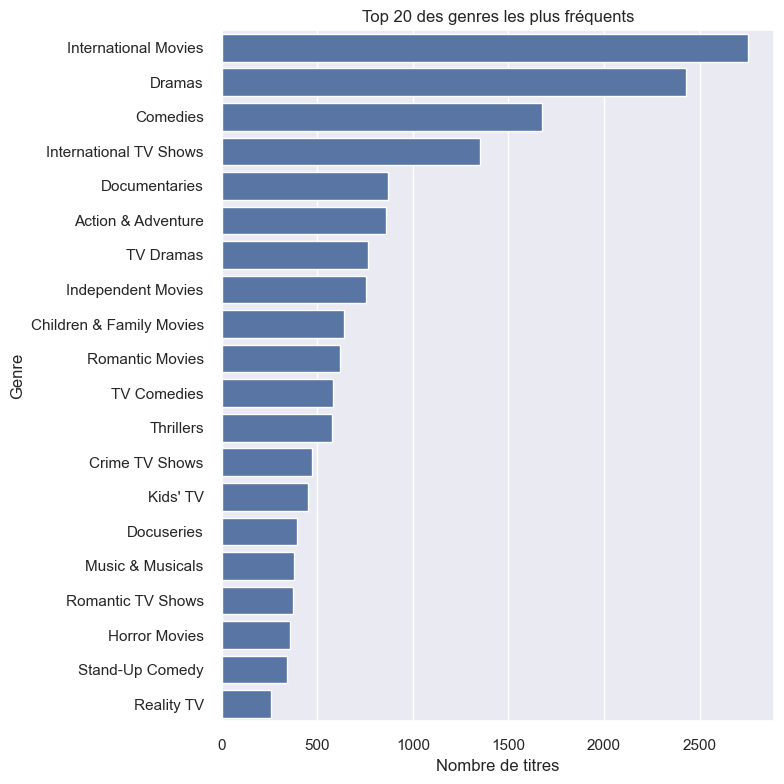

In [10]:
# Explosion des genres
genres_series = (
    df_clean["listed_in"]
    .str.split(",")
    .explode()
    .str.strip()
)

top_genres = genres_series.value_counts().head(20)

plt.figure(figsize=(8, 8))
sns.barplot(y=top_genres.index, x=top_genres.values)
plt.title("Top 20 des genres les plus fréquents")
plt.xlabel("Nombre de titres")
plt.ylabel("Genre")
plt.tight_layout()
plt.show()

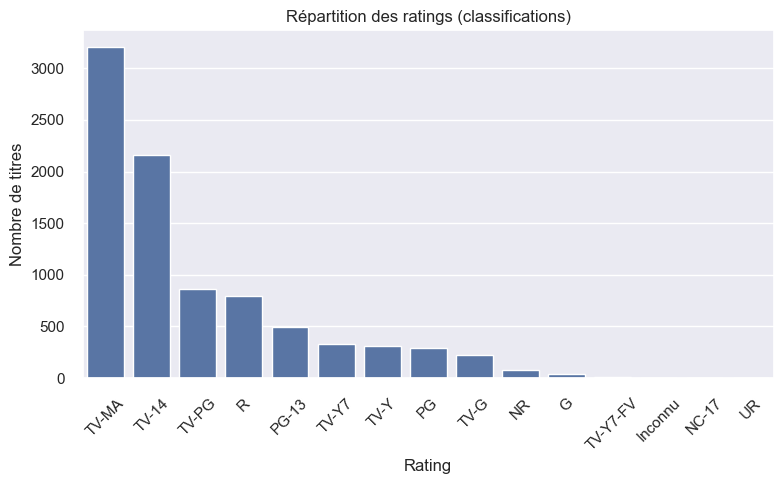

In [11]:
rating_counts = df_clean["rating"].value_counts().head(15)

plt.figure(figsize=(8, 5))
sns.barplot(x=rating_counts.index, y=rating_counts.values)
plt.title("Répartition des ratings (classifications)")
plt.xlabel("Rating")
plt.ylabel("Nombre de titres")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [12]:
movies = df_clean[df_clean["type"] == "Movie"].copy()
shows = df_clean[df_clean["type"] == "TV Show"].copy()

# ---- FILMS ----
# Extraire le nombre de minutes ("90 min") → 90
movies["duration_min"] = (
    movies["duration"]
        .str.replace(" min", "", regex=False)
        .str.strip()
)

# Convertir en numérique (remplace les trucs invalides en NaN)
movies["duration_min"] = pd.to_numeric(movies["duration_min"], errors="coerce")

# Supprimer les lignes sans durée
movies = movies.dropna(subset=["duration_min"])

movies["duration_min"] = movies["duration_min"].astype(int)


# ---- SERIES ----
# "3 Seasons" ou "1 Season"
shows["seasons"] = (
    shows["duration"]
        .str.replace(" Seasons", "", regex=False)
        .str.replace(" Season", "", regex=False)
        .str.strip()
)

# Convertir en numérique
shows["seasons"] = pd.to_numeric(shows["seasons"], errors="coerce")

# Supprimer les lignes invalides
shows = shows.dropna(subset=["seasons"])

shows["seasons"] = shows["seasons"].astype(int)

display(movies.head())
display(shows.head())


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,main_country,duration_min
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Inconnu,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021.0,9.0,United States,90
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",Inconnu,2021-09-24,2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,2021.0,9.0,Inconnu,91
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",2021.0,9.0,United States,125
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,2021-09-24,2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...,2021.0,9.0,United States,104
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic",2021-09-23,2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...,2021.0,9.0,Germany,127


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,main_country,seasons
1,s2,TV Show,Blood & Water,Inconnu,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021.0,9.0,South Africa,2
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Inconnu,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021.0,9.0,Inconnu,1
3,s4,TV Show,Jailbirds New Orleans,Inconnu,Inconnu,Inconnu,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021.0,9.0,Inconnu,1
4,s5,TV Show,Kota Factory,Inconnu,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021.0,9.0,India,2
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",Inconnu,2021-09-24,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...,2021.0,9.0,Inconnu,1


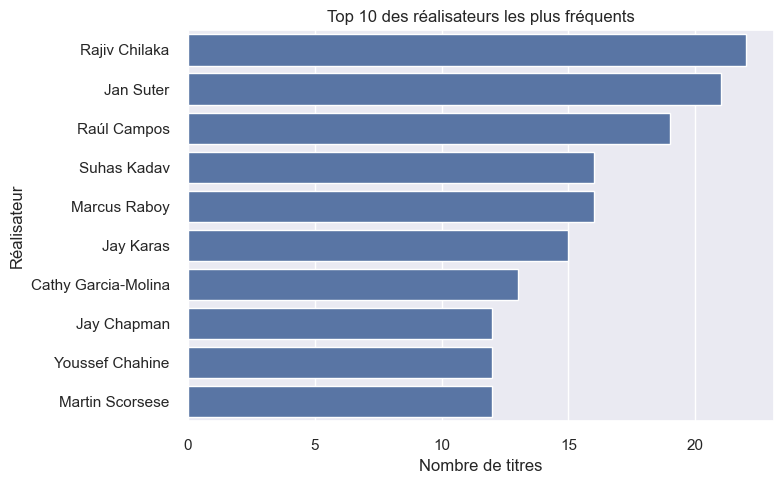

In [13]:
# Top réalisateurs
directors_series = (
    df_clean["director"]
    .replace("Inconnu", np.nan)
    .dropna()
    .str.split(",")
    .explode()
    .str.strip()
)

top_directors = directors_series.value_counts().head(10)
top_directors
plt.figure(figsize=(8, 5))
sns.barplot(y=top_directors.index, x=top_directors.values)
plt.title("Top 10 des réalisateurs les plus fréquents")
plt.xlabel("Nombre de titres")
plt.ylabel("Réalisateur")
plt.tight_layout()
plt.show()

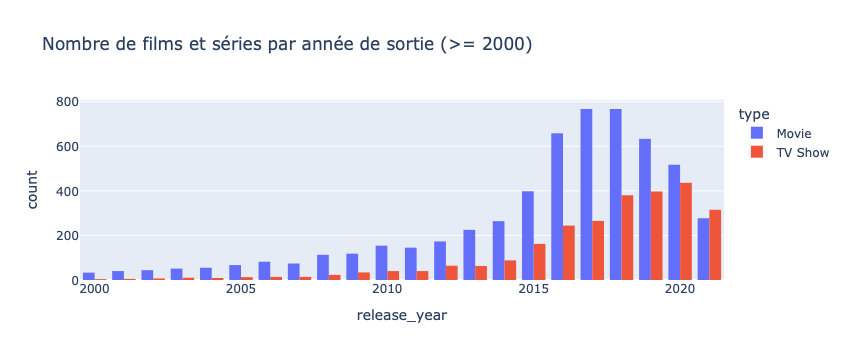

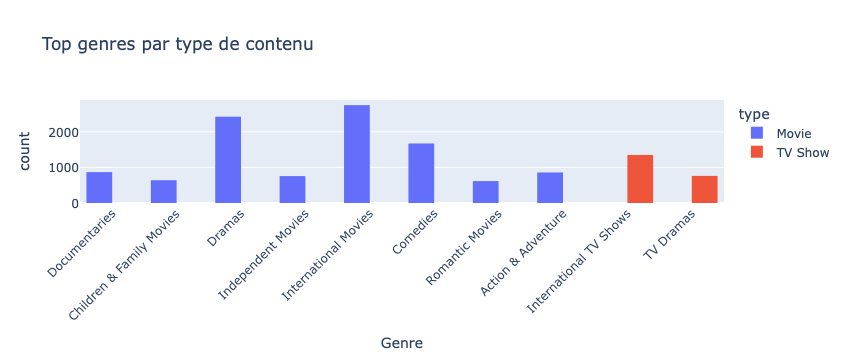

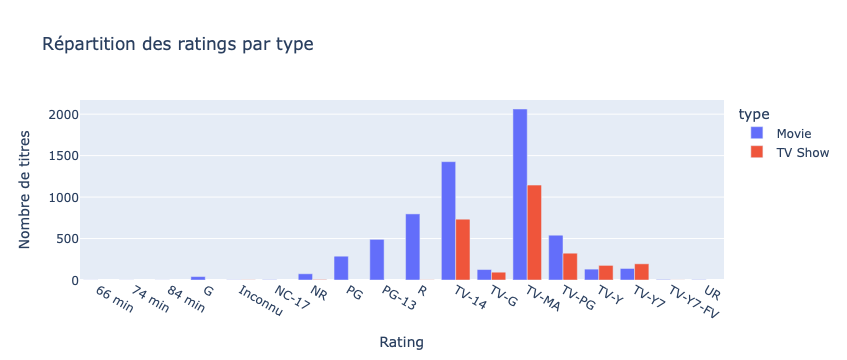

In [14]:
# Films vs séries par année de sortie
fig = px.histogram(df_clean[df_clean["release_year"] >= 2000],
                   x="release_year",
                   color="type",
                   barmode="group",
                   title="Nombre de films et séries par année de sortie (>= 2000)")
fig.show()
# Genres principaux par type (Movie / TV Show)
# Genres principaux par type (Movie / TV Show)
genres_df = (
    df_clean
        .assign(genre=df_clean["listed_in"].str.split(","))  # transforme les listes de genres
        .explode("genre")                                   # une ligne par genre
)

# Nettoyage du texte
genres_df["genre"] = genres_df["genre"].str.strip().replace("", "Inconnu")

# Top 10 des genres les plus courants
top_genres_10 = genres_df["genre"].value_counts().head(10).index

# Filtrer uniquement ces 10 genres
filtered_genres = genres_df[genres_df["genre"].isin(top_genres_10)]

# Visualisation Plotly
fig = px.histogram(
    filtered_genres,
    x="genre",
    color="type",
    barmode="group",
    title="Top genres par type de contenu",
    labels={"genre": "Genre", "count": "Nombre de titres"},
)

fig.update_layout(xaxis_tickangle=-45)
fig.show()

# Agrégation : nombre de contenus pour chaque rating et chaque type
rating_counts = (
    df_clean
    .groupby(["rating", "type"])
    .size()
    .reset_index(name="count")
)

# Visualisation Plotly
fig = px.bar(rating_counts,
             x="rating",
             y="count",
             color="type",
             barmode="group",
             title="Répartition des ratings par type")

fig.update_layout(xaxis_title="Rating", yaxis_title="Nombre de titres")
fig.show()